In [3]:
# Libraries
import pandas as pd
from scripts.db_utils import create_postgress_engine

In [4]:
# Establishing Connectivity - the Engine
engine = create_postgress_engine(username='benscottie',
                                 password='Bethel2001$', 
                                 dialect_driver='postgresql', 
                                 host='sec-test.csfr6b0gmrjt.us-east-1.rds.amazonaws.com',
                                 port='5432', 
                                 database='sec_db')

In [6]:
# View Table / Create DataFrame
sql = 'select * from item_sentiment'
with engine.connect() as con:
    df = pd.read_sql_query(sql, con=con)
print(f'Data Size: {df.shape[0]} Records')
df.head()

Data Size: 43


,id,company,date,year,item_text,sentiment_score
0,110,AAPL,2008-09-27,2008,management’s discussion and analysis of financ...,None
1,111,AAPL,2006-09-30,2006,management’s discussion and analysis of financ...,None
2,112,AAPL,2019-09-28,2019,management’s discussion and analysis of financ...,None
3,113,AAPL,2012-09-29,2012,management’s discussion and analysis of financ...,None
4,114,AAPL,2017-09-30,2017,management’s discussion and analysis of financ...,None


In [7]:
# Create Text Length Column
df['text_len'] = df.item_text.str.split().str.len()

Text(0.5, 0, 'Text Length (Words)')

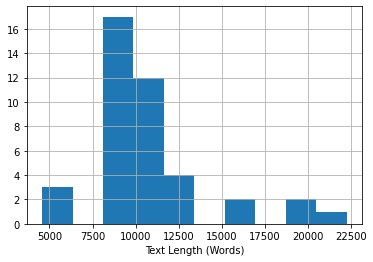

In [15]:
# View Text Length Distribution
df = df[df['text_len']>0]
plt = df['text_len'].hist()
plt.set_xlabel('Text Length (Words)')